In [12]:
class RANSAC1:
    def __init__(self, max_iters_k=100, treshold=0.5, min_acceptable_inliers=100):
        self.max_iters_k=max_iters_k
        self.treshold=treshold
        self.min_acceptable_inliers=min_acceptable_inliers
        
        self.best_model=None
        self.best_inlier_count=0
        self.inlier_mask=None
        
    def fit(self, X, y, show_partial_results=False):
        assert X.shape[1]==1, 'The input matrix should have only one dimension/column'
        assert X.shape[0]>1.5 * self.min_acceptable_inliers, 'The input matrix should have only one dimension/column'
        
        #initialize data
        self.best_model=None
        self.best_inlier_count=0
        self.inlier_mask=None
        
        #prepare data
        sample_size=X.shape[1]+1
        data=np.hstack((X[:,0].reshape(-1,1), y.reshape(-1,1)))
        
        for i in range(self.max_iters_k):
            
            #randomly choose points
            rand_idx=np.random.choice(len(data), size=sample_size, replace=False)
            points=data[rand_idx,:]
            
            #determine the line equation
            a=(points[0,1]-points[1,1])/(points[0,0]-points[1,0]+sys.float_info.epsilon)
            b=points[0,1]-a*points[0,0]
            
            #calculate 'predicted' points
            y_pred=a*data[:,0]+b
            
            #determine points within treshold
            this_inlier_mask=np.square(y_pred-y)<self.treshold
            this_inlier_count=np.sum(this_inlier_mask)
            
            #check if a better model was found, if yes - save it
            better_found=((this_inlier_count>self.min_acceptable_inliers)
                         and (this_inlier_count>self.best_inlier_count))
            if better_found:
                self.best_model=(a,b)
                self.best_inlier_count=this_inlier_count
                self.inlier_mask=this_inlier_mask
            
            if show_partial_results:
                line_X=np.arange(X.min(), X.max())[:,np.newaxis]
                line_y=a*line_X+b
                
                plt.scatter(X[this_inlier_mask], y[this_inlier_mask], color='g', 
                           marker='.', label='Inliers')
                plt.scatter(X[~this_inlier_mask], y[~this_inlier_mask], color='r', 
                           marker='.', label='Outliers')
                plt.plot(line_X, line_y, color='b', linewidth=2, label='RANSAC')
                plt.scatter(points[:,0], points[:,1], color='black', marker='o',
                           label='Sampled points', s=100)
                plt.legend(loc='lower right')
                plt.xlabel('Input')
                plt.ylabel('Response')
                plt.show()

In [13]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']

data = pd.read_csv(r"C:\PythonScripts\course-files2\housing.data",
                   sep=' +', engine='python', header=None, 
                   names=cols)

X = data.loc[:, 'LSTAT'].values.reshape(-1,1)
y = data['MEDV'].values
X[:10]

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ]])

In [14]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

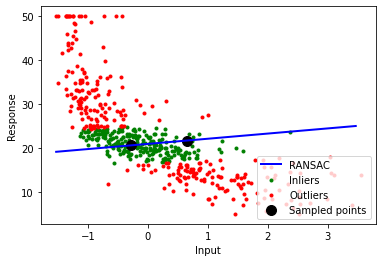

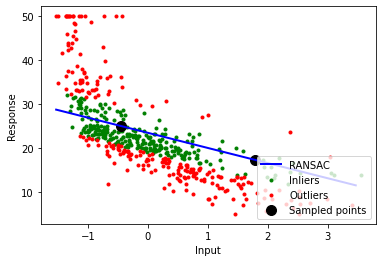

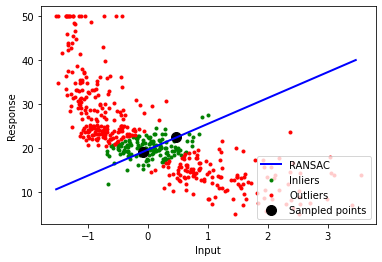

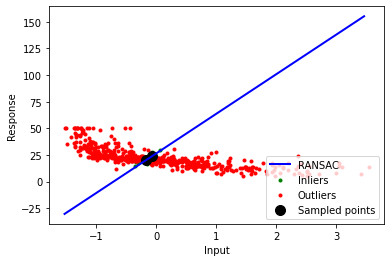

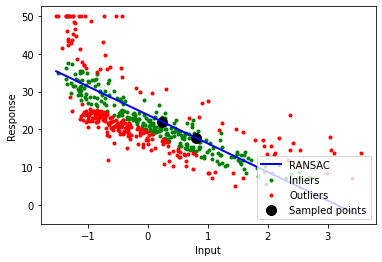

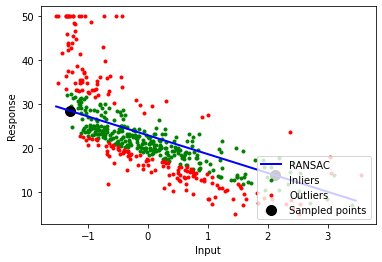

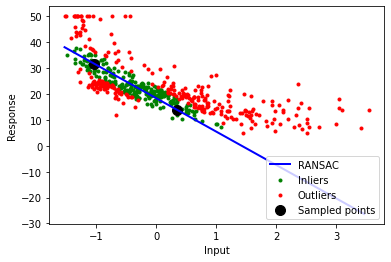

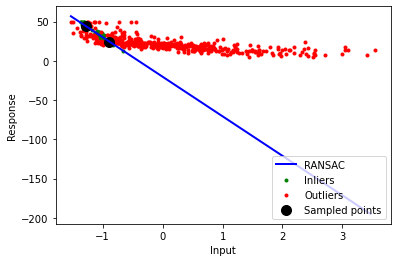

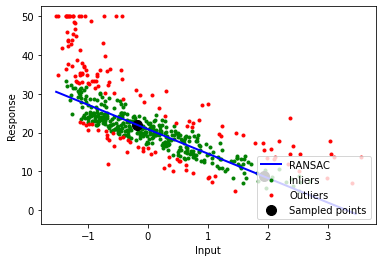

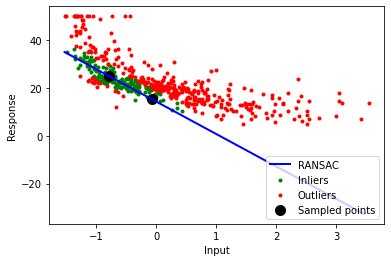

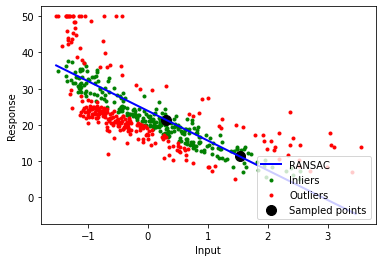

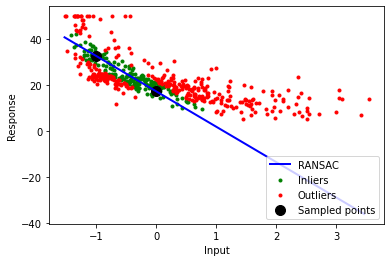

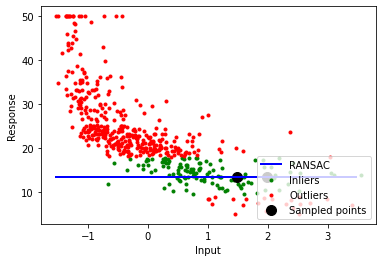

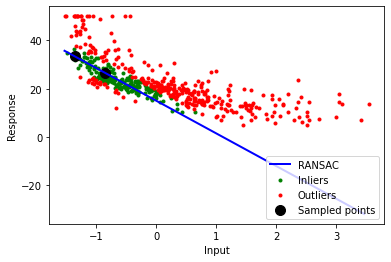

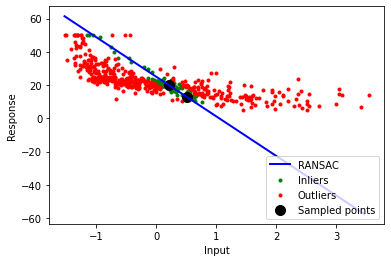

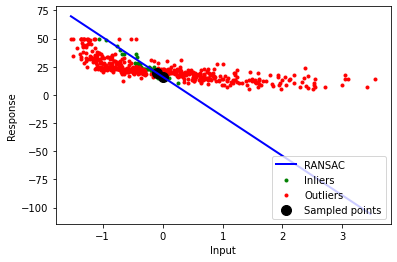

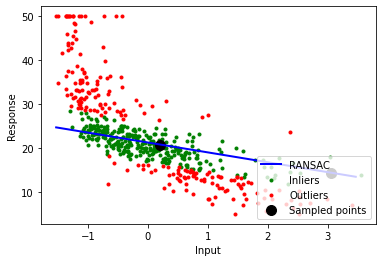

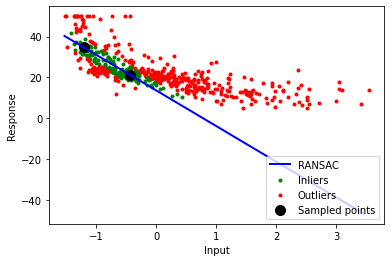

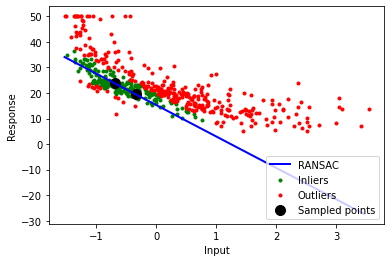

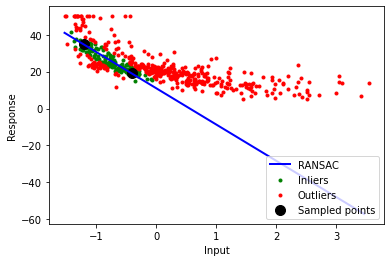

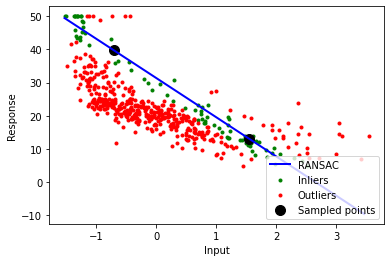

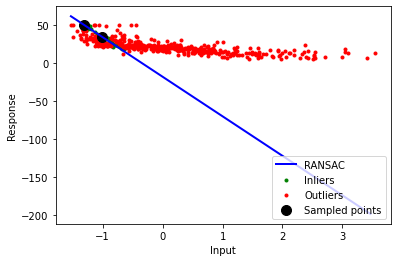

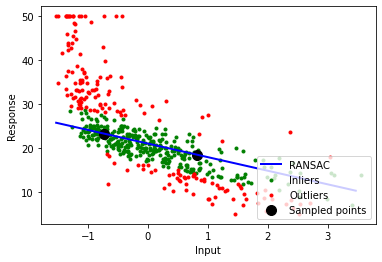

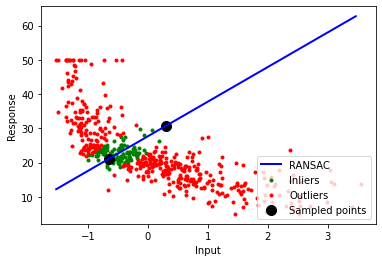

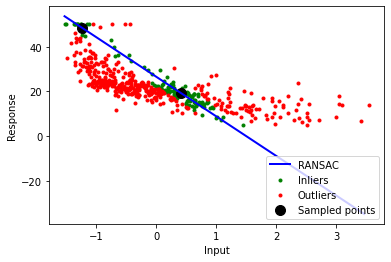

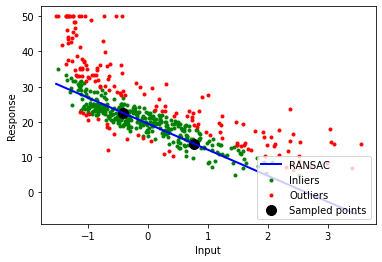

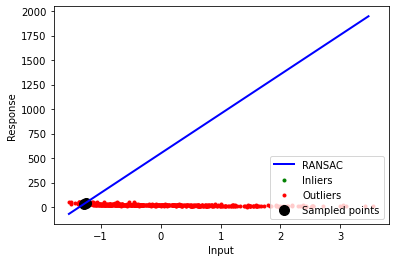

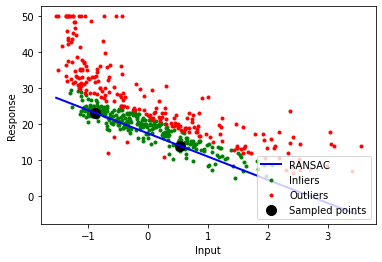

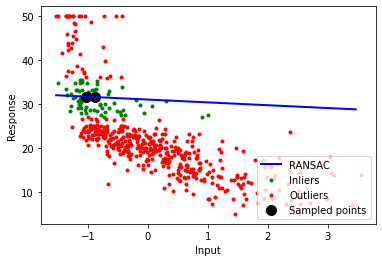

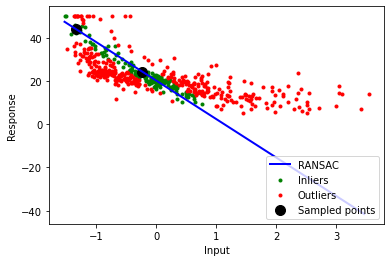

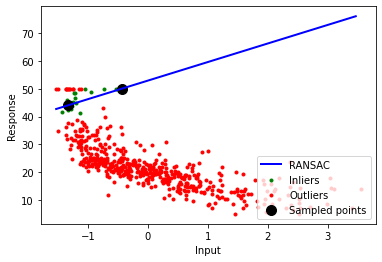

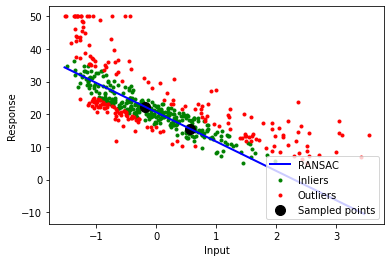

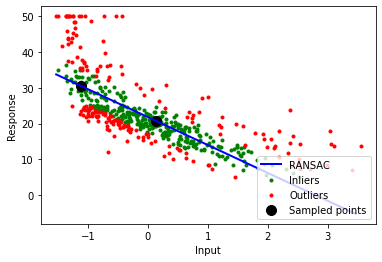

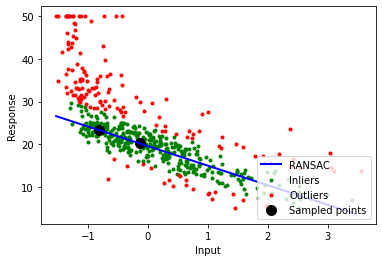

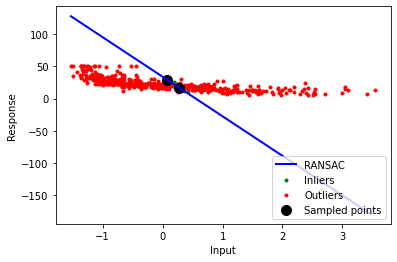

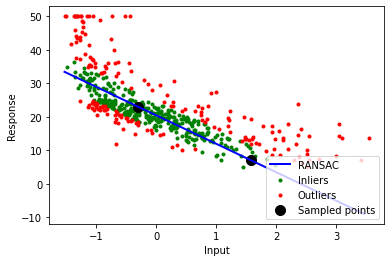

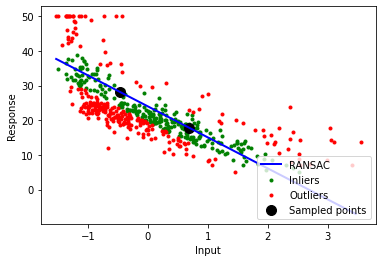

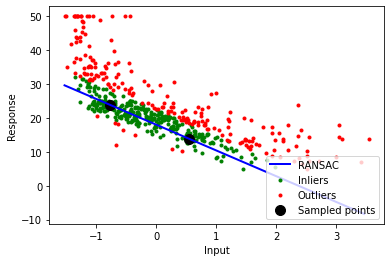

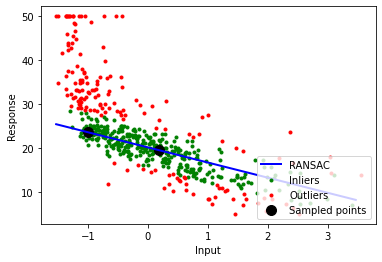

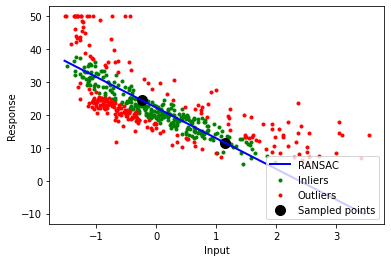

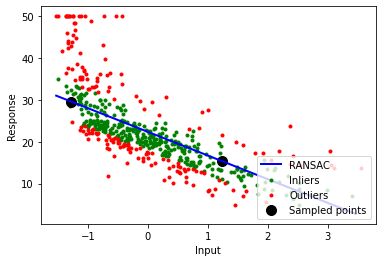

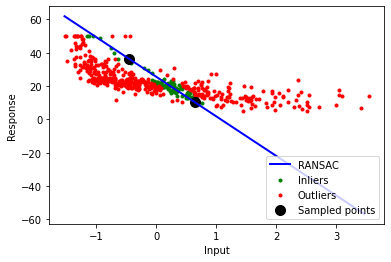

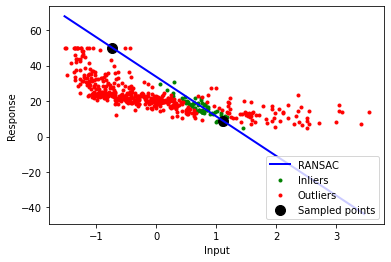

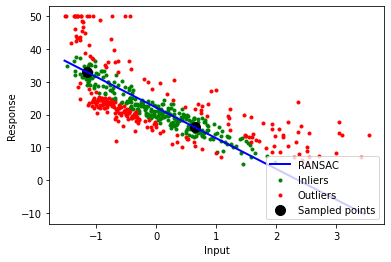

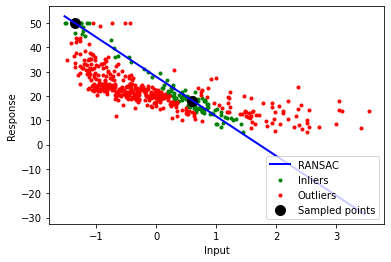

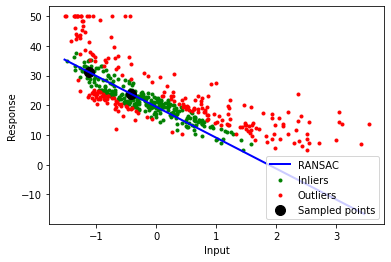

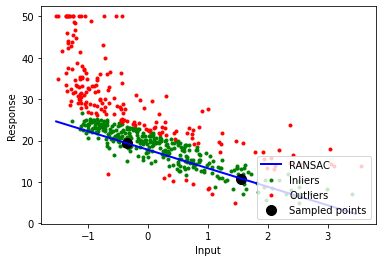

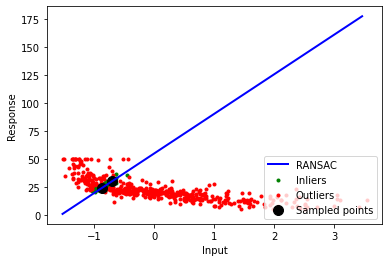

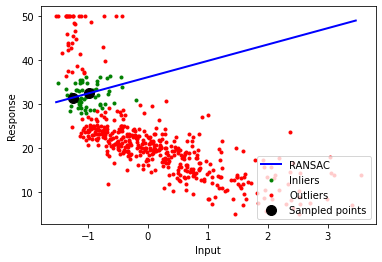

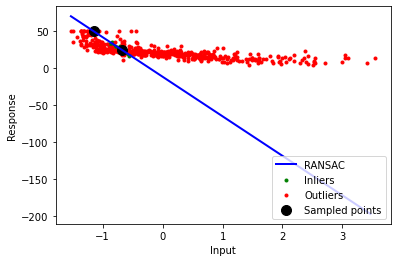

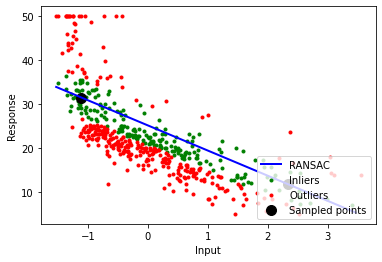

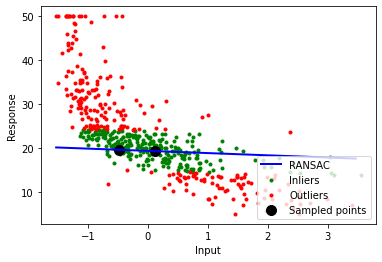

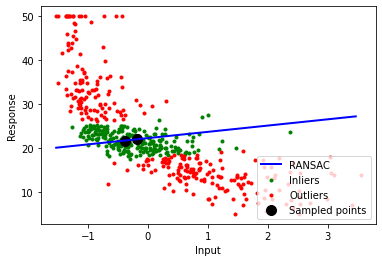

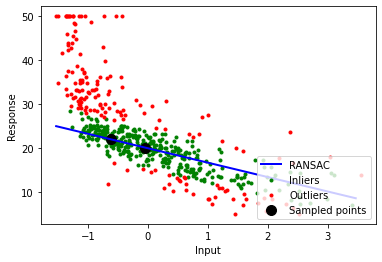

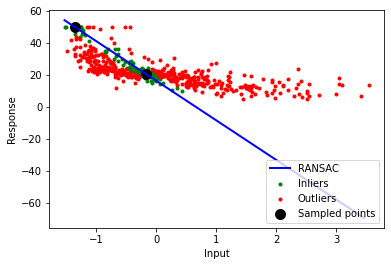

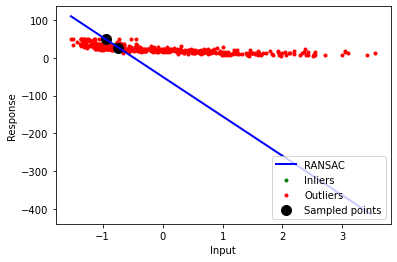

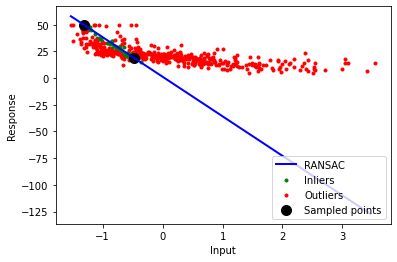

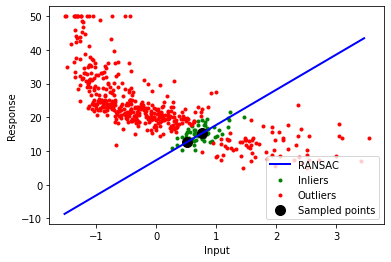

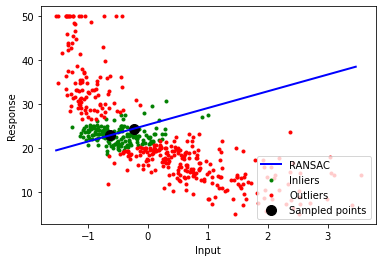

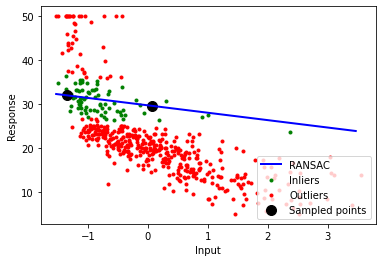

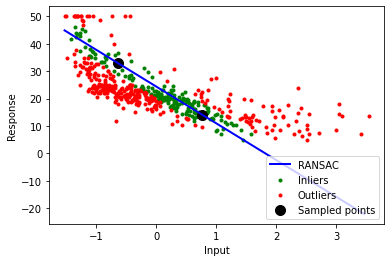

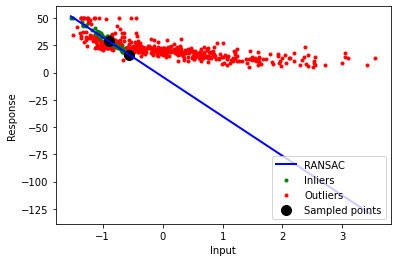

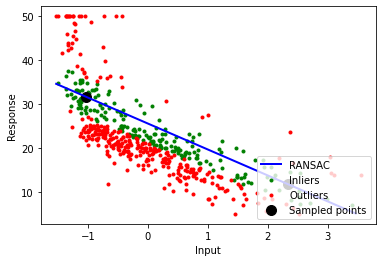

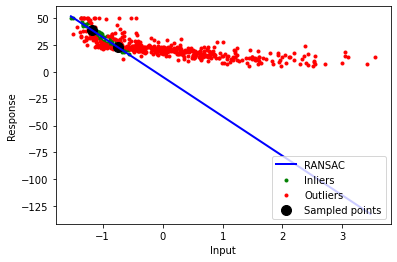

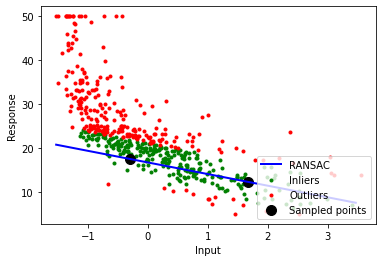

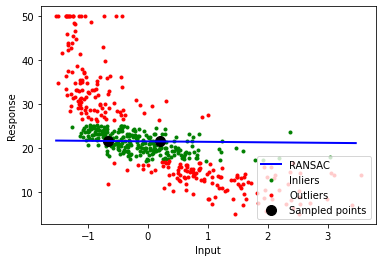

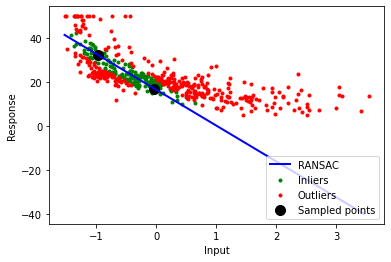

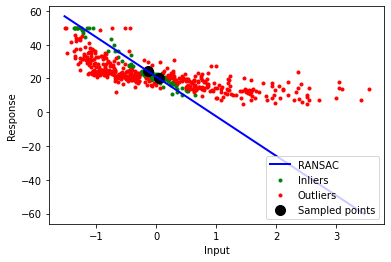

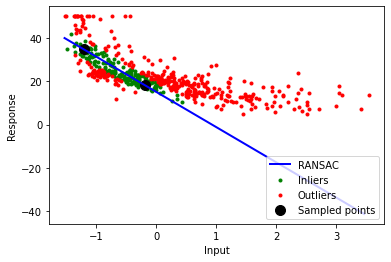

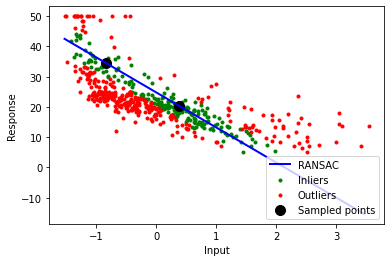

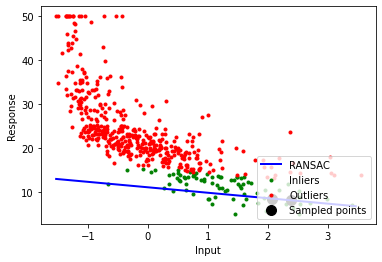

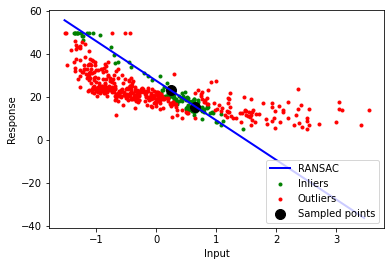

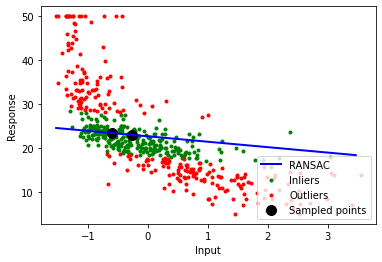

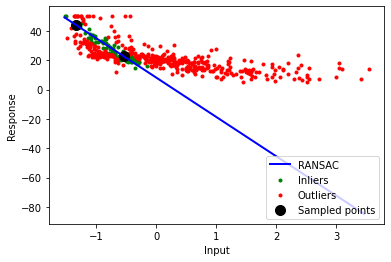

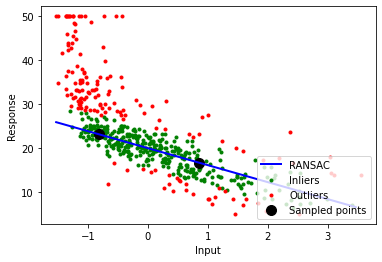

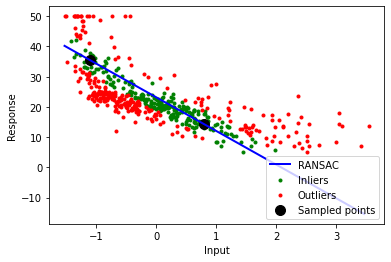

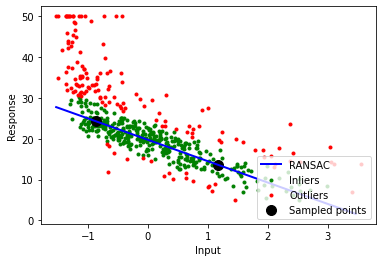

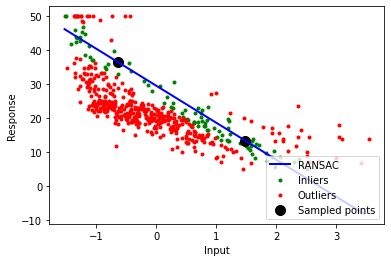

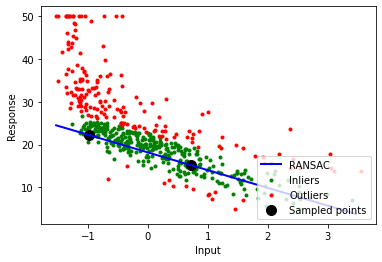

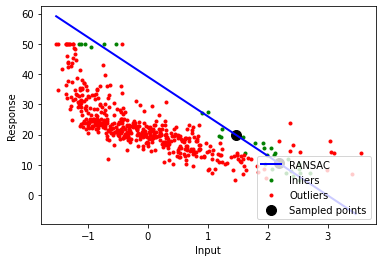

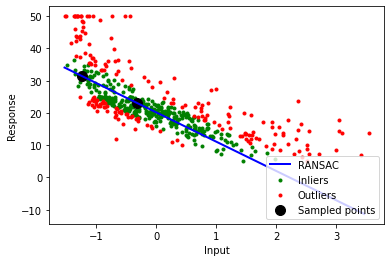

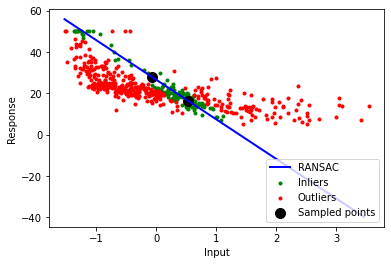

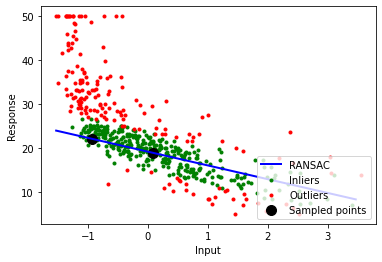

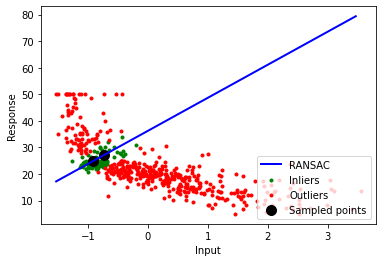

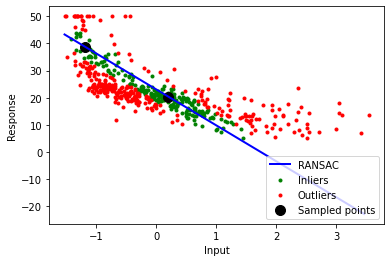

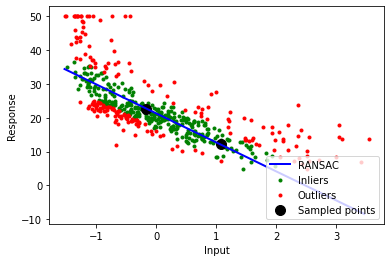

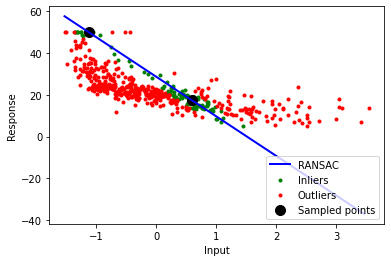

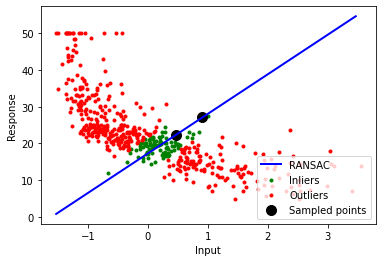

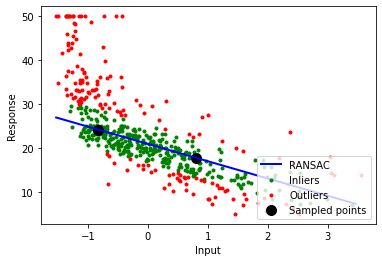

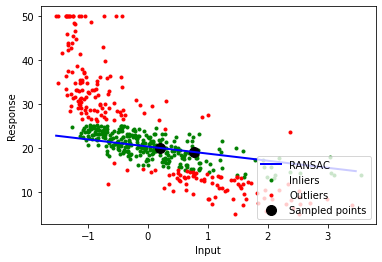

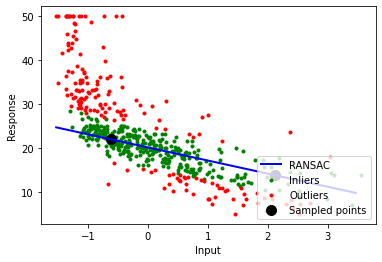

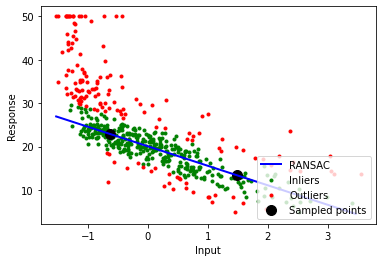

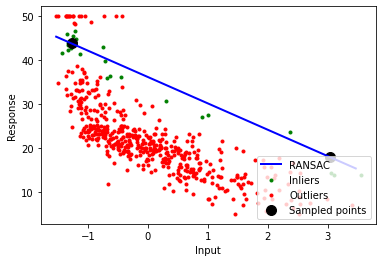

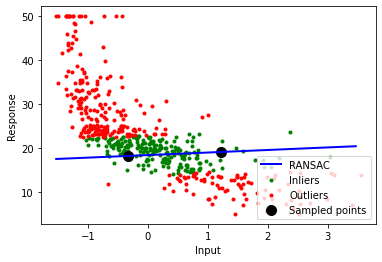

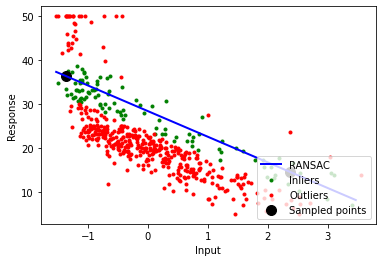

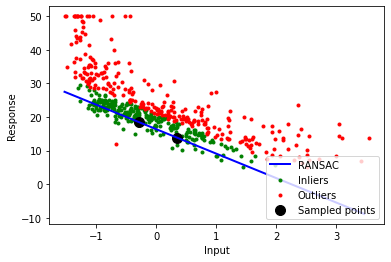

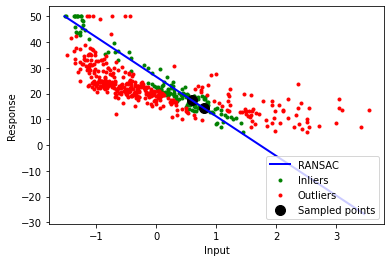

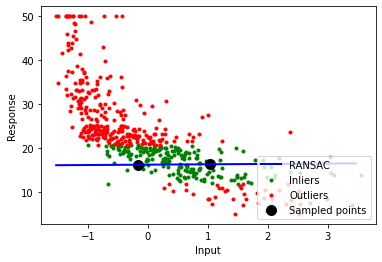

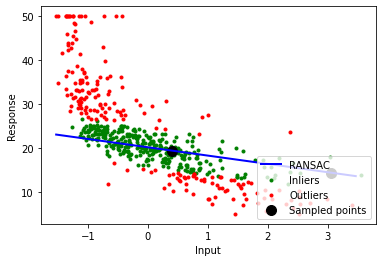

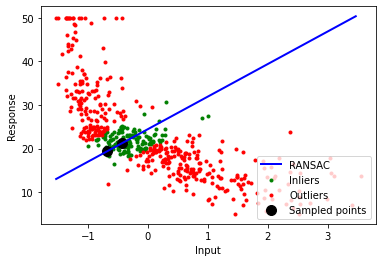

In [15]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

ransac = RANSAC1(max_iters_k = 100, treshold = 20, min_acceptable_inliers = 100)
ransac.fit(X, y, show_partial_results=True)

X_train, X_test, y_train, y_test = train_test_split(X[ransac.inlier_mask], 
                                                    y[ransac.inlier_mask], 
                                                    test_size=0.3)

lr = LinearRegression()
lr.fit(X_train, y_train)                
y_pred = lr.predict(X_test)                

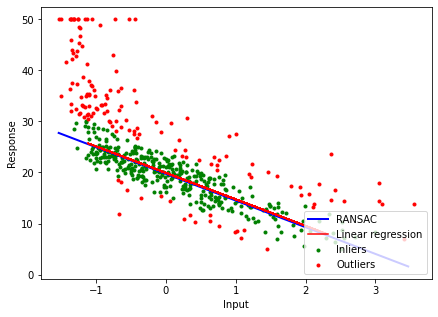

In [16]:
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = ransac.best_model[0] * line_X + ransac.best_model[1]

plt.figure(figsize=(7,5))
plt.scatter(X[ransac.inlier_mask], y[ransac.inlier_mask], color='green', 
            marker='.', label='Inliers')
plt.scatter(X[~ransac.inlier_mask], y[~ransac.inlier_mask], color='red', 
            marker='.', label='Outliers')
plt.plot(line_X, line_y, color='blue', linewidth=2, label='RANSAC')
plt.plot(X_test, y_pred, color='red', label='Linear regression')

plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()         